In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random

In [ ]:
annotations=pd.read_csv('/content/drive/MyDrive/Dataset/annotations.csv')
candidates=pd.read_csv('/content/drive/MyDrive/Dataset/candidates.csv')
annotations.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [ ]:
candidates.head()

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0


In [ ]:
print(len(annotations))
print(len(candidates))

1186
551065


In [ ]:
positives = candidates[candidates['class']==1].index
negatives = candidates[candidates['class']==0].index

In [ ]:
print(len(positives))
print(len(negatives))

1351
549714


In [ ]:
positives

Index([    13,     78,   1303,   3050,   3052,   3080,   3223,   3285,   3287,
         3289,
       ...
       545928, 546205, 546372, 546400, 547498, 548674, 550171, 550334, 550810,
       550906],
      dtype='int64', length=1351)

In [ ]:
np.random.seed(42)
negIndexes = np.random.choice(negatives, len(positives)*5, replace = False)

In [ ]:
candidatesDf = candidates.iloc[list(positives)+list(negIndexes)]

In [ ]:
candidatesDf

,seriesuid,coordX,coordY,coordZ,class
13,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,104.164804,-211.685591,-227.011364,1
78,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.940000,-175.040000,-297.870000,1
1303,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,70.190000,-140.930000,877.680000,1
3050,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,89.320000,190.840000,-516.820000,1
3052,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,94.930000,153.030000,-429.910000,1
...,...,...,...,...,...
179890,1.3.6.1.4.1.14519.5.2.1.6279.6001.198698492013...,-111.329211,11.569059,-296.428421,0
478391,1.3.6.1.4.1.14519.5.2.1.6279.6001.624425075947...,-98.890000,33.300000,-205.520000,0
104437,1.3.6.1.4.1.14519.5.2.1.6279.6001.156821379677...,35.347896,-14.618686,-204.364945,0
53212,1.3.6.1.4.1.14519.5.2.1.6279.6001.129007566048...,60.276636,87.780554,-54.408637,0


In [ ]:
from sklearn.model_selection import train_test_split
X = candidatesDf.iloc[:,:-1]
y = candidatesDf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train.size

25936

In [ ]:
y_train

,class
178085,0
108126,0
416697,0
342095,0
116478,0
...,...
469116,0
164439,0
333192,1
358382,0


In [ ]:
y_test

,class
189342,0
145102,0
31546,0
441280,1
215578,0
...,...
87015,0
245189,0
533231,0
52755,0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)

In [ ]:
X_train.size

20748

In [ ]:
X_train

,seriesuid,coordX,coordY,coordZ
59270,1.3.6.1.4.1.14519.5.2.1.6279.6001.132817748896...,-97.808167,3.897917,-201.030000
150277,1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929...,58.990000,-24.230000,-18.320000
432208,1.3.6.1.4.1.14519.5.2.1.6279.6001.397522780537...,-50.307219,159.439740,-113.418797
423122,1.3.6.1.4.1.14519.5.2.1.6279.6001.339882192295...,-106.731000,-104.468000,751.163333
344581,1.3.6.1.4.1.14519.5.2.1.6279.6001.296863826932...,67.240000,-32.590000,-107.790000
...,...,...,...,...
323102,1.3.6.1.4.1.14519.5.2.1.6279.6001.279953669991...,-22.239361,84.653132,-161.740390
94004,1.3.6.1.4.1.14519.5.2.1.6279.6001.149893110752...,52.320000,65.000000,-117.870000
459476,1.3.6.1.4.1.14519.5.2.1.6279.6001.503980049263...,-112.420630,37.648160,-67.928064
241550,1.3.6.1.4.1.14519.5.2.1.6279.6001.230416590143...,-27.740000,-121.660000,-254.130000


In [ ]:
y_train

,class
59270,0
150277,0
432208,0
423122,0
344581,0
...,...
323102,0
94004,0
459476,1
241550,0


In [ ]:
X_train.to_pickle('/content/drive/MyDrive/Dataset/Preprocessed_data/traindata')
X_test.to_pickle('/content/drive/MyDrive/Dataset/Preprocessed_data/testdata')
X_val.to_pickle('/content/drive/MyDrive/Dataset/Preprocessed_data/valdata')

In [ ]:
# prompt: load x_train,x_test,x_val

import pandas as pd
X_train = pd.read_pickle('/content/drive/MyDrive/Dataset/Preprocessed_data/traindata')
X_test = pd.read_pickle('/content/drive/MyDrive/Dataset/Preprocessed_data/testdata')
X_val = pd.read_pickle('/content/drive/MyDrive/Dataset/Preprocessed_data/valdata')


In [ ]:
def normalizePlanes(npzarray):
    maxHU = 400.
    minHU = -1000.
    npzarray = (npzarray - minHU) / (maxHU - minHU)
    npzarray[npzarray>1] = 1.
    npzarray[npzarray<0] = 0.
    return npzarray

In [ ]:
print('number of positive cases are ' + str(y_train.sum()))
print('total set size is ' + str(len(y_train)))
print('percentage of positive cases are ' + str(y_train.sum()*1.0/len(y_train)))

number of positive cases are 845
total set size is 5187
percentage of positive cases are 0.16290726817042606


In [ ]:
tempDf = X_train[y_train == 1]
tempDf = tempDf.set_index(X_train[y_train == 1].index + 1000000)
X_train_new = pd.concat([X_train, tempDf]) # Use pd.concat to combine DataFrames
tempDf = tempDf.set_index(X_train[y_train == 1].index + 2000000)
X_train_new = pd.concat([X_train_new, tempDf]) # Use pd.concat to combine DataFrames

ytemp = y_train.reindex(X_train[y_train == 1].index + 1000000)
ytemp.loc[:] = 1
y_train_new = pd.concat([y_train, ytemp]) # Use pd.concat to combine Series
ytemp = y_train.reindex(X_train[y_train == 1].index + 2000000)
ytemp.loc[:] = 1
y_train_new = pd.concat([y_train_new, ytemp]) # Use pd.concat to combine Series

print(len(X_train_new), len(y_train_new))

6877 6877


In [ ]:
X_train_new

,seriesuid,coordX,coordY,coordZ
59270,1.3.6.1.4.1.14519.5.2.1.6279.6001.132817748896...,-97.808167,3.897917,-201.030000
150277,1.3.6.1.4.1.14519.5.2.1.6279.6001.182192086929...,58.990000,-24.230000,-18.320000
432208,1.3.6.1.4.1.14519.5.2.1.6279.6001.397522780537...,-50.307219,159.439740,-113.418797
423122,1.3.6.1.4.1.14519.5.2.1.6279.6001.339882192295...,-106.731000,-104.468000,751.163333
344581,1.3.6.1.4.1.14519.5.2.1.6279.6001.296863826932...,67.240000,-32.590000,-107.790000
...,...,...,...,...
2436163,1.3.6.1.4.1.14519.5.2.1.6279.6001.404768898286...,88.955096,224.250740,-586.901865
2013078,1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982...,-57.089458,72.608061,1791.668825
2352132,1.3.6.1.4.1.14519.5.2.1.6279.6001.300246184547...,100.136716,3.904990,-93.909072
2188812,1.3.6.1.4.1.14519.5.2.1.6279.6001.202187810895...,118.180000,-42.910000,-247.440000


In [ ]:
y_train_new

,class
59270,0.0
150277,0.0
432208,0.0
423122,0.0
344581,0.0
...,...
2436163,1.0
2013078,1.0
2352132,1.0
2188812,1.0


In [ ]:
X_train_new.index

Index([  59270,  150277,  432208,  423122,  344581,   75111,  246217,  292479,
        147683,  468235,
       ...
       2282167, 2300642, 2021354, 2461166, 2332952, 2436163, 2013078, 2352132,
       2188812, 2459476],
      dtype='int64', length=6877)

In [ ]:
from PIL import ImageEnhance

class PreProcessing(object):
    def __init__(self, image = None):
        self.image = image

    def subtract_mean(self):
        self.image = (self.image/255.0 - 0.25)*255
        return self.image

    def downsample_data(self):
        self.image = cv2.resize(self.image, (40,40), interpolation = cv2.INTER_AREA)
        return self.image

    def upsample_data(self):
        self.image = cv2.resize(self.image, (224, 224), interpolation = cv2.INTER_CUBIC)
        return self.image

Original shape of input image:  (50, 50)


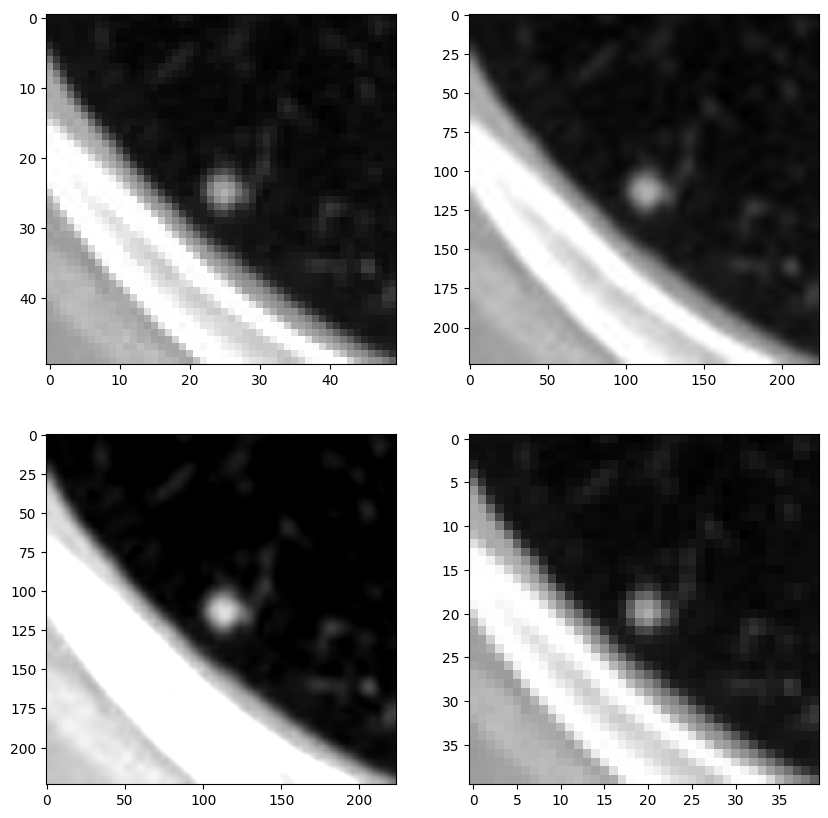

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread
from PIL import Image
import cv2  # Import the OpenCV library

dirName = '/content/drive/My Drive/Dataset/train/'
plt.figure(figsize = (10,10))
inp = imread(dirName + 'image_'+ str(30517) + '.jpg')
print ("Original shape of input image: ", inp.shape)
plt.subplot(221)
plt.imshow(inp, cmap='gray')
plt.grid(False)

inp = PreProcessing(inp).upsample_data()
Pp = PreProcessing(inp)

inp2 = Pp.subtract_mean()
plt.subplot(222)
plt.imshow(inp2, cmap='gray')
plt.grid(False)

inp3 = ImageEnhance.Contrast(Image.fromarray(inp))
contrast = 1.5
inp3 = inp3.enhance(contrast)
plt.subplot(223)
plt.imshow(inp3, cmap='gray')
plt.grid(False)

inp4 = Pp.downsample_data()
plt.subplot(224)
plt.imshow(inp4,cmap='gray')
plt.grid(False)

In [ ]:
inp.shape

(224, 224)

In [ ]:
y_train_new.values.astype(int)

array([0, 0, 0, ..., 1, 1, 1])

**Training**

In [ ]:
dirName

'/content/drive/My Drive/Dataset/train/'

In [ ]:

train_filenames =\
X_train_new.index.to_series().apply(lambda x:\
                                    '/content/drive/My Drive/Dataset/train/image_'+str(x)+'.jpg')
train_filenames.values.astype(str)


array(['/content/drive/My Drive/Dataset/train/image_59270.jpg',
       '/content/drive/My Drive/Dataset/train/image_150277.jpg',
       '/content/drive/My Drive/Dataset/train/image_432208.jpg', ...,
       '/content/drive/My Drive/Dataset/train/image_2352132.jpg',
       '/content/drive/My Drive/Dataset/train/image_2188812.jpg',
       '/content/drive/My Drive/Dataset/train/image_2459476.jpg'],
      dtype='<U55')

In [ ]:
train_filenames.values.astype(str)

array(['/content/drive/My Drive/Dataset/train/image_59270.jpg',
       '/content/drive/My Drive/Dataset/train/image_150277.jpg',
       '/content/drive/My Drive/Dataset/train/image_432208.jpg', ...,
       '/content/drive/My Drive/Dataset/train/image_2352132.jpg',
       '/content/drive/My Drive/Dataset/train/image_2188812.jpg',
       '/content/drive/My Drive/Dataset/train/image_2459476.jpg'],
      dtype='<U55')

In [ ]:
dataset_file = 'traindatalabels.txt'
# Convert each filename in the lists to string individually if needed
train_filenames_str = train_filenames.apply(lambda x: [str(filename) for filename in x])
filenames = train_filenames_str.values
train_filenames = X_train_new.index.to_series().apply(lambda x: filenames) # Consider revising this line based on your intended logic
labels = y_train_new.values.astype(int)

In [ ]:
train_filenames = X_train_new.index.to_series().apply(
    lambda x: f'/content/drive/My Drive/Dataset/train/image_{x}.jpg'
)
filenames = train_filenames.values.astype(str)
labels = y_train_new.values.astype(int)

# Prepare data for saving
traindata = pd.DataFrame({
    'filename': filenames,
    'label': labels
})

traindata.to_csv(dataset_file, sep=' ', header=False, index=False, escapechar='\\', quoting=3)


In [ ]:
import numpy as np
import h5py
import cv2
import pandas as pd
import os

# Parameters
image_shape = (50, 50)  # Desired image shape
output_path = 'dataset.h5'
dataset_file = 'traindatalabels.txt'  # Text file with image paths and labels
base_dir = '/content/drive/MyDrive/Dataset/train/'  # Base directory for image files

# Read dataset file
data = pd.read_csv(dataset_file, delimiter=' ', header=None, names=['filename', 'label'])

# Display the first few filenames to check their format
print(data.head())

# Extract the filename part (e.g., image_{x}) and prepend the base directory
data['filename'] = data['filename'].apply(lambda x: os.path.join(base_dir, os.path.basename(x)))

# Extract filenames and labels
filenames = data['filename'].values
labels = data['label'].values

# Convert labels to integers if they are not already
labels = labels.astype(np.int32)

# One-hot encode labels
num_classes = 2
labels_one_hot = np.zeros((len(labels), num_classes), dtype=np.float32)
labels_one_hot[np.arange(len(labels)), labels] = 1

# Create a new HDF5 file
with h5py.File(output_path, 'w') as f:
    # Create dataset for images
    X_dset = f.create_dataset('X', (len(filenames), *image_shape), dtype='<f4')

    # Create dataset for one-hot encoded labels
    y_dset = f.create_dataset('y', (len(filenames), num_classes), dtype='<f4')

    # Iterate over the filenames and labels
    for i, (filename, label) in enumerate(zip(filenames, labels)):
        try:
            # Check if the file exists
            if not os.path.isfile(filename):
                raise FileNotFoundError(f"File not found: {filename}")

            # Read the image
            image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

            # Check if the image was loaded correctly
            if image is None:
                raise ValueError(f"Image at {filename} could not be read. It might be corrupted or unsupported format.")

            # Resize the image to the desired shape
            image = cv2.resize(image, image_shape, interpolation=cv2.INTER_AREA)

            # Normalize the image to the range [0, 1]
            image = image.astype(np.float32) / 255.0

            # Store the image in the HDF5 dataset
            X_dset[i, :, :] = image

            # Store the one-hot encoded label
            y_dset[i, :] = labels_one_hot[i]

        except Exception as e:
            print(f"Error processing image {filename}: {e}")

print("HDF5 dataset created successfully!")

# Verify the shape of the dataset
with h5py.File(output_path, 'r') as f:
    print(f['X'].shape)  # Should output (number_of_images, 50, 50)
    print(f['y'].shape)  # Should output (number_of_images, 2)


                                                filename  label
/content/drive/My\   Drive/Dataset/train/image_59270.jpg      0
/content/drive/My\  Drive/Dataset/train/image_150277.jpg      0
/content/drive/My\  Drive/Dataset/train/image_432208.jpg      0
/content/drive/My\  Drive/Dataset/train/image_423122.jpg      0
/content/drive/My\  Drive/Dataset/train/image_344581.jpg      0
HDF5 dataset created successfully!
(6877, 50, 50)
(6877, 2)


In [ ]:
# prompt: load the traindataset.h5

import h5py

# Load the HDF5 dataset
with h5py.File('/content/drive/MyDrive/Dataset/traindataset.h5', 'r') as hdf5_file:
    images = hdf5_file['X'][:]
    labels = hdf5_file['Y'][:]

print("Dataset loaded.")
print("Image shape:", images.shape)
print("Labels shape:", labels.shape)


Dataset loaded.
Image shape: (5187, 50, 50)
Labels shape: (5187, 2)


In [ ]:
# prompt: load val.h5 file

# Load the val.h5 dataset
with h5py.File('/content/drive/MyDrive/Dataset/val.h5', 'r') as hdf5_file:
    images_val = hdf5_file['X'][:]
    labels_val = hdf5_file['Y'][:]

print("Val Dataset loaded.")
print("Val Image shape:", images_val.shape)
print("Val Labels shape:", labels_val.shape)


Val Dataset loaded.
Val Image shape: (1297, 50, 50, 1)
Val Labels shape: (1297, 2)


In [ ]:

X_train_processing = np.array(images)
X_train_processing

array([[[0.11764706, 0.10588235, 0.09019608, ..., 0.03529412,
         0.05882353, 0.0627451 ],
        [0.11372549, 0.09411765, 0.08235294, ..., 0.04313726,
         0.05098039, 0.05490196],
        [0.11372549, 0.09411765, 0.08235294, ..., 0.05490196,
         0.05882353, 0.05882353],
        ...,
        [0.10196079, 0.09411765, 0.09019608, ..., 0.10196079,
         0.09019608, 0.08627451],
        [0.10196079, 0.10196079, 0.10588235, ..., 0.09019608,
         0.07450981, 0.06666667],
        [0.09803922, 0.09411765, 0.09803922, ..., 0.08627451,
         0.0627451 , 0.05490196]],

       [[0.13725491, 0.07058824, 0.07450981, ..., 0.07843138,
         0.07450981, 0.06666667],
        [0.15294118, 0.08627451, 0.05882353, ..., 0.11764706,
         0.09411765, 0.07450981],
        [0.15686275, 0.10980392, 0.05490196, ..., 0.19607843,
         0.07843138, 0.04705882],
        ...,
        [0.10588235, 0.11764706, 0.14509805, ..., 0.06666667,
         0.08235294, 0.08235294],
        [0.1

In [ ]:
X_val_processing = np.array(images_val)

In [ ]:

print(X_train_processing.shape)

(5187, 50, 50)


In [ ]:

print(X_train_processing.dtype)

float32


In [ ]:
img_test = X_train_processing[1000]
img_test_downsampled = PreProcessing(img_test).downsample_data()
img_test_upsampled = PreProcessing(img_test).upsample_data()

In [ ]:
img_test_downsampled.shape

(40, 40)

In [ ]:
img_test_upsampled.shape

(224, 224)

In [ ]:
print(labels[1000])

[1. 0.]


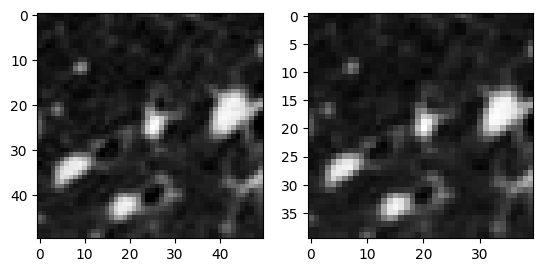

In [ ]:
plt.subplot(121)
plt.imshow(img_test,cmap='gray')
plt.subplot(122)
plt.imshow(img_test_downsampled,cmap='gray')

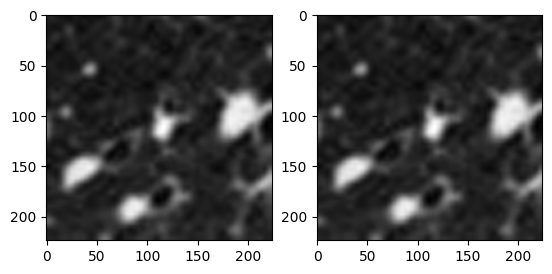

In [ ]:
img_test_subtracted_mean = PreProcessing(img_test_upsampled).subtract_mean()
plt.subplot(121)
plt.imshow(img_test_upsampled,cmap='gray')
plt.subplot(122)
plt.imshow(img_test_subtracted_mean,cmap='gray')

In [ ]:
X_train_images_np = np.expand_dims(np.array(images), axis = 3)
y_train_labels_np = np.array(labels)
X_val_images_np = np.expand_dims(np.array(images_val), axis = 3)
y_val_labels_np = np.array(labels_val)
print(X_val_images_np.shape)
print(y_val_labels_np.shape)
print(X_train_images_np.shape)
print(y_train_labels_np.shape)

(1297, 50, 50, 1, 1)
(1297, 2)
(5187, 50, 50, 1)
(5187, 2)


In [ ]:
print(X_train_images_np.dtype)
print(y_train_labels_np.dtype)

float32
float32


In [ ]:
h5f2 = h5py.File('/content/drive/My Drive/Dataset/testdataset.h5', 'r')
X_test_images = h5f2['X']
Y_test_labels = h5f2['Y']


X_test_images_np = np.expand_dims(np.array(X_test_images), axis = 3)
y_test_labels_np = np.array(Y_test_labels)


print(X_test_images_np.shape)
print(y_test_labels_np.shape)

(1622, 50, 50, 1)
(1622, 2)


In [ ]:

print(X_test_images_np.dtype)
print(y_test_labels_np.dtype)

float32
float32


**Model Building**

In [ ]:
import numpy as np
import h5py
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.utils import class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
with h5py.File('/content/drive/MyDrive/Dataset/traindataset.h5', 'r') as hdf5_file:
    X_train_images_np = np.array(hdf5_file['X'][:])  # Remove extra expand_dims
    y_train_labels_np = np.array(hdf5_file['Y'][:])

with h5py.File('/content/drive/MyDrive/Dataset/val.h5', 'r') as hdf5_file:
    X_val_images_np = np.array(hdf5_file['X'][:])   # Remove extra expand_dims
    y_val_labels_np = np.array(hdf5_file['Y'][:])

with h5py.File('/content/drive/MyDrive/Dataset/testdataset.h5', 'r') as hdf5_file:
    X_test_images_np = np.array(hdf5_file['X'][:])  # Remove extra expand_dims
    y_test_labels_np = np.array(hdf5_file['Y'][:])

# Add a single expand_dims if needed to ensure the shape is (samples, height, width, channels)
if X_train_images_np.ndim == 3:
    X_train_images_np = np.expand_dims(X_train_images_np, axis=-1)
if X_val_images_np.ndim == 3:
    X_val_images_np = np.expand_dims(X_val_images_np, axis=-1)
if X_test_images_np.ndim == 3:
    X_test_images_np = np.expand_dims(X_test_images_np, axis=-1)

print("Training set shape:", X_train_images_np.shape, y_train_labels_np.shape)
print("Validation set shape:", X_val_images_np.shape, y_val_labels_np.shape)
print("Test set shape:", X_test_images_np.shape, y_test_labels_np.shape)

Training set shape: (5187, 50, 50, 1) (5187, 2)
Validation set shape: (1297, 50, 50, 1) (1297, 2)
Test set shape: (1622, 50, 50, 1) (1622, 2)


In [ ]:
# prompt: calculate the tottal number of possitives and negiatives in traindataset

import numpy as np
# Calculate the total number of positives and negatives in the training dataset
num_positives = np.sum(y_train_labels_np[:, 1])  # Assuming the second column represents positive cases
num_negatives = np.sum(y_train_labels_np[:, 0])  # Assuming the first column represents negative cases

print("Total Positives:", num_positives)
print("Total Negatives:", num_negatives)


Total Positives: 845.0
Total Negatives: 4342.0


In [ ]:
def create_model(input_shape=(50, 50, 1)):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    return model

def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)
        alpha_t = y_true * alpha + (tf.ones_like(y_true) - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (tf.ones_like(y_true) - y_true) * (tf.ones_like(y_pred) - y_pred)
        fl = - alpha_t * tf.keras.backend.pow((tf.ones_like(y_true) - p_t), gamma) * tf.keras.backend.log(p_t)
        return tf.reduce_mean(fl)
    return focal_loss_fixed

model = create_model()
model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 50, 50, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 50, 50, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                        

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import class_weight

tf.config.run_functions_eagerly(True)
steps_per_epoch = X_train_images_np.shape[0] // 32
validation_steps = X_val_images_np.shape[0] // 32
def single_input_generator(generator):
    for X_batch, y_batch in generator:
        yield X_batch, y_batch
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(X_train_images_np, y_train_labels_np, batch_size=32, shuffle=True)
val_generator = val_test_datagen.flow(X_val_images_np, y_val_labels_np, batch_size=32, shuffle=False)

train_multi_generator = tf.data.Dataset.from_generator(
    lambda: single_input_generator(train_generator),
    output_signature=(
        tf.TensorSpec(shape=(None, 50, 50, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 2), dtype=tf.float32)
    )
)

val_multi_generator = tf.data.Dataset.from_generator(
    lambda: single_input_generator(val_generator),
    output_signature=(
        tf.TensorSpec(shape=(None, 50, 50, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 2), dtype=tf.float32)
    )
)




/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [ ]:
# prompt: calculate the class weights of possitive and negative

import numpy as np
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_labels_np[:, 1]),
    y=y_train_labels_np[:, 1]
)

# Convert class weights to a dictionary
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class Weights:", class_weight_dict)


Class Weights: {0: 0.5973053892215568, 1: 3.0692307692307694}


In [ ]:
# Check if the original generators are working correctly
for i in range(5):
    X_batch, y_batch = next(train_generator)
    print(f"Batch {i+1}: X_batch shape = {X_batch.shape}, y_batch shape = {y_batch.shape}")

# Check if the single_input_generator function is working
for i in range(5):
    X_batch, y_batch = next(single_input_generator(train_generator))
    print(f"Batch {i+1}: X_batch shape = {X_batch.shape}, y_batch shape = {y_batch.shape}")

# Check if the tf.data.Dataset is yielding data
for i, (X_batch, y_batch) in enumerate(train_multi_generator.take(5)):
    print(f"Batch {i+1}: X_batch shape = {X_batch.shape}, y_batch shape = {y_batch.shape}")

Batch 1: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 2: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 3: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 4: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 5: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 1: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 2: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 3: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 4: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 5: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 1: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 2: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 3: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 4: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)
Batch 5: X_batch shape = (32, 50, 50, 1), y_batch shape = (32, 2)


In [ ]:
# Define your model (make sure it’s defined correctly)
model = create_model()

# Compile the model with Focal Loss
model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)

# Check the class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_labels_np[:, 1]),
    y=y_train_labels_np[:, 1]
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}


history = model.fit(
    train_multi_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=500,
    validation_data=val_multi_generator,
    validation_steps=validation_steps,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


162/162 [==============================] - ETA: 0s - loss: 0.1930 - accuracy: 0.6836
Epoch 1: val_accuracy improved from -inf to 0.82812, saving model to best_model.keras
162/162 [==============================] - 38s 233ms/step - loss: 0.1930 - accuracy: 0.6836 - val_loss: 0.0605 - val_accuracy: 0.8281 - lr: 0.0010
Epoch 2/500
162/162 [==============================] - ETA: 0s - loss: 0.0913 - accuracy: 0.7787
Epoch 2: val_accuracy did not improve from 0.82812
162/162 [==============================] - 38s 233ms/step - loss: 0.0913 - accuracy: 0.7787 - val_loss: 0.0651 - val_accuracy: 0.8281 - lr: 0.0010
Epoch 3/500
162/162 [==============================] - ETA: 0s - loss: 0.0685 - accuracy: 0.7994
Epoch 3: val_accuracy did not improve from 0.82812
162/162 [==============================] - 37s 228ms/step - loss: 0.0685 - accuracy: 0.7994 - val_loss: 0.0678 - val_accuracy: 0.8281 - lr: 0.0010
Epoch 4/500
162/162 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.

In [ ]:
# prompt: test the model accuracy in test generstor

# Evaluate the model on the test set
test_generator = val_test_datagen.flow(X_test_images_np, y_test_labels_np, batch_size=32, shuffle=False)
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


51/51 [==============================] - 2s 41ms/step - loss: 0.0164 - accuracy: 0.9538
Test Loss: 0.0164
Test Accuracy: 0.9538


In [ ]:
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_labels_np, axis=1)

# Adjusting the threshold
threshold = 0.4
y_pred_adjusted = (y_pred_prob[:, 1] >= threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_adjusted)
print("Confusion Matrix:\n", cm)

51/51 [==============================] - 2s 34ms/step
Confusion Matrix:
 [[1266   74]
 [  22  260]]


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      1340
           1       0.74      0.91      0.82       282

    accuracy                           0.93      1622
   macro avg       0.86      0.92      0.89      1622
weighted avg       0.94      0.93      0.93      1622



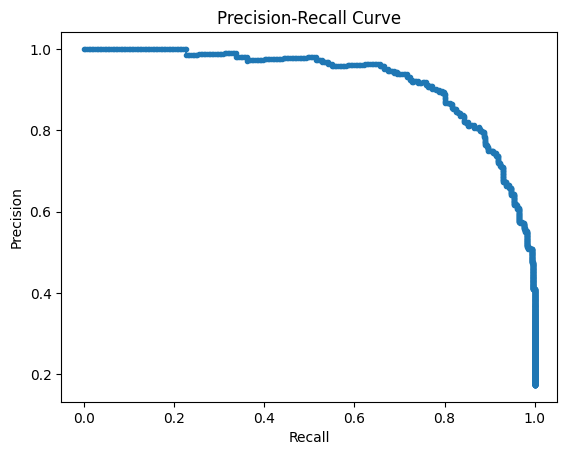

In [ ]:
report = classification_report(y_true, y_pred_adjusted)
print("Classification Report:\n", report)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob[:, 1])
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Save the model for future use
model.save('improved_model.keras')

In [ ]:
# prompt: save the updated model in .h5 format

model.save('/content/drive/MyDrive/Dataset/improved_model_1.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


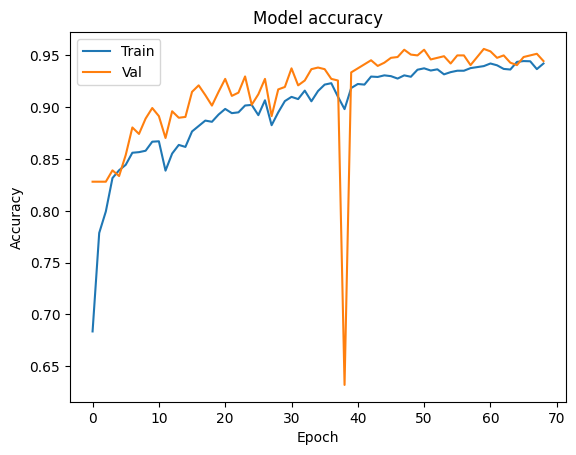

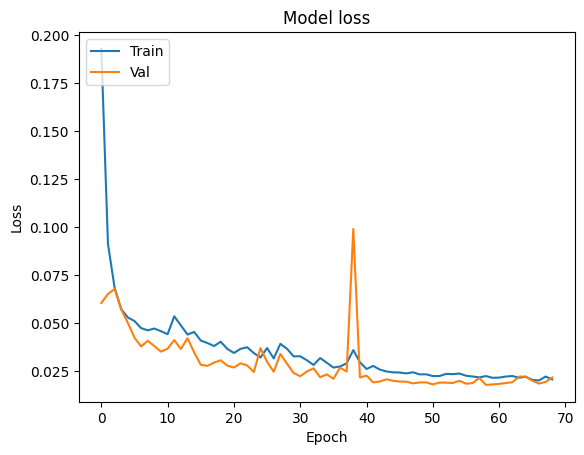

In [ ]:
# prompt: plot the accuracy and loss curves on both train and val dayasets seperately

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


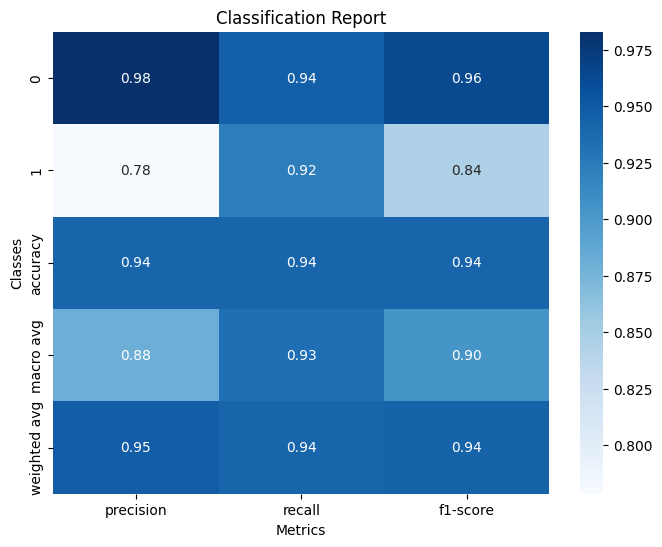

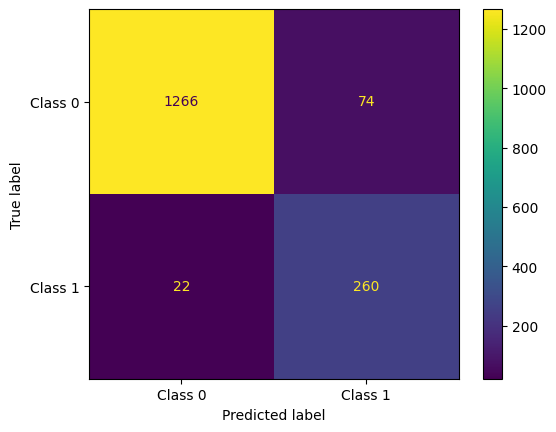

In [ ]:
# prompt: plot the classification report for the above model

import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
!pip install seaborn
import seaborn as sns # Added this line to import the seaborn library

# Assuming y_true and y_pred are already defined

report = classification_report(y_true, y_pred_adjusted, output_dict=True)

# Plotting the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, fmt=".2f", cmap="Blues")
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

# Alternatively, you can use ConfusionMatrixDisplay for a more visual representation
cm = confusion_matrix(y_true, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import tensorflow as tf

# Redefine the focal_loss function
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)
        alpha_t = y_true * alpha + (tf.ones_like(y_true) - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (tf.ones_like(y_true) - y_true) * (tf.ones_like(y_pred) - y_pred)
        fl = - alpha_t * tf.keras.backend.pow((tf.ones_like(y_true) - p_t), gamma) * tf.keras.backend.log(p_t)
        return tf.reduce_mean(fl)
    return focal_loss_fixed

# Register the custom loss function with Keras
tf.keras.utils.get_custom_objects().update({"focal_loss_fixed": focal_loss()})

# Load the saved model with the custom loss function
model = load_model('/content/drive/MyDrive/Dataset/improved_model_1.h5')

# Load and preprocess the sample image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Load as grayscale
    img = img.resize((50, 50))  # Resize to match model input size
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    return img_array

# Provide the path to your sample image
image_path = '/content/drive/MyDrive/Dataset/test/image_353297.jpg'

# Preprocess the image
img_array = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(img_array)

predicted_class = np.argmax(prediction[0])  # Get the index of the class with the highest probability

# Print the prediction
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 43ms/step
Predicted class: 1


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [ ]:
# prompt: print the testdatalabels.txt where label is 1

import pandas as pd
# Read the dataset file
data = pd.read_csv('/content/drive/MyDrive/Dataset/testdatalabels.txt', delimiter=' ', header=None, names=['filename', 'label'])

# Filter the data where label is 1
filtered_data = data[data['label'] == 1]

# Print the filtered data
print(filtered_data)


                   filename  label
3     test/image_441280.jpg      1
5     test/image_315896.jpg      1
8     test/image_179650.jpg      1
25    test/image_379773.jpg      1
26    test/image_353297.jpg      1
...                     ...    ...
1582  test/image_242899.jpg      1
1588   test/image_32118.jpg      1
1596  test/image_169613.jpg      1
1603  test/image_124632.jpg      1
1611  test/image_461441.jpg      1

[282 rows x 2 columns]
